# Settings

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


In [35]:
# upload csv to google colab
from google.colab import files
test = files.upload()
train = files.upload()

Saving test.csv to test (1).csv


Saving train.csv to train (1).csv


In [36]:
# uploaded file to pandas dataframe
import io
test_df = pd.read_csv(io.BytesIO(test['test.csv']))
train_df = pd.read_csv(io.BytesIO(train['train.csv']))

In [37]:
# test_df.info()
# train_df.info()
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
# missing data
total = train_df.isnull().sum().sort_values(ascending=False)
# print(total)
percent = (train_df.isnull().sum() / train_df.isnull().count() * 100).sort_values(ascending=False).head(5)
print(percent)

Cabin       77.104377
Age         19.865320
Embarked     0.224467
Fare         0.000000
Ticket       0.000000
dtype: float64


# Analyze

In [39]:
# pd.set_option('display.max_columns', None)
print(train_df.head(5))

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


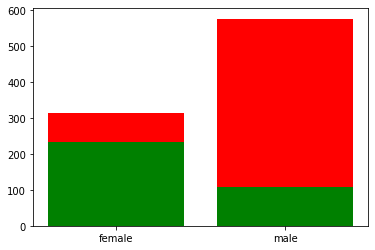

In [40]:
# gender survival stacked bar 
survived_female = len(train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'female')].index)
survived_male = len(train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'male')].index)

non_survived_female = len(train_df[(train_df['Survived'] == 0) & (train_df['Sex'] == 'female')].index)
non_survived_male = len(train_df[(train_df['Survived'] == 0) & (train_df['Sex'] == 'male')].index)


survived = [survived_female, survived_male]
died = [non_survived_female, non_survived_male]


plt.bar(['female', 'male'], survived, color='g')
plt.bar(['female', 'male'], died, color='r', bottom=survived)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

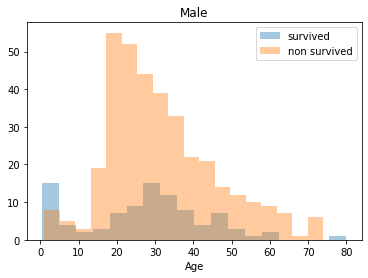

In [41]:
# male survival
plt1 = sns.distplot(train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'male')].Age.dropna(), label = 'survived', bins=18, kde = False)
plt1 = sns.distplot(train_df[(train_df['Survived'] == 0) & (train_df['Sex'] == 'male')].Age.dropna(), label = 'non survived', bins=18, kde = False)
plt1.legend()
plt1.set_title('Male')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Female')

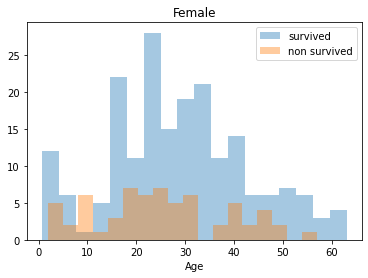

In [42]:
# female survival
plt2 = sns.distplot(train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'female')].Age.dropna(), label = 'survived', bins=18, kde = False)
plt2 = sns.distplot(train_df[(train_df['Survived'] == 0) & (train_df['Sex'] == 'female')].Age.dropna(), label = 'non survived', bins=18, kde = False)
plt2.legend()
plt2.set_title('Female')

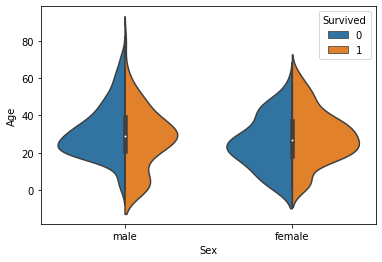

In [43]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_df, split=True)

No handles with labels found to put in legend.


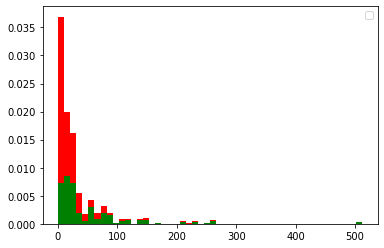

In [44]:
# survival by ticket fare
plt.figure()

plt.hist([train_df[train_df['Survived']==1]['Fare'], train_df[train_df['Survived']==0]['Fare']], bins=50, color=['g', 'r'] ,stacked=True, density=True)
plt.legend()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


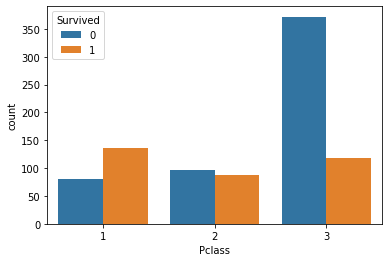

In [45]:
# survival by class
sns.countplot(train_df['Pclass'], hue=train_df['Survived'])

# Feature Engineering

In [46]:
# combined dataframe
combined_df = train_df.append(test_df)
combined_df.drop(labels=['Survived', 'PassengerId'], axis=1)
print(combined_df.shape)
print(train_df.shape)

(1309, 12)
(891, 12)


In [47]:
# process title
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    combined_df['Title'] = combined_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    combined_df['Title'] = combined_df.Title.map(Title_Dictionary)
    # status('Title')
    return combined_df

In [49]:
combined_df = get_titles()
combined_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [50]:
combined_df[combined_df['Title'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [51]:
# Process age
grouped_train = combined_df.iloc[:891].groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


In [52]:
def fill_age(row):
  condition = (
      (grouped_median_train['Sex'] == row['Sex']) &
      (grouped_median_train['Title'] == row['Title']) &
      (grouped_median_train['Pclass'] == row['Pclass'])
  )
  return grouped_median_train[condition]['Age'].values[0]

def process_age():
  global combined_df
  combined_df['Age'] = combined_df.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
  return combined_df

combined_df = process_age()

In [53]:
# Process name & title
def process_names():
  global combined_df
  combined_df.drop('Name', axis=1, inplace=True)

  titles_dummies = pd.get_dummies(combined_df['Title'], prefix='Title')
  combined_df = pd.concat([combined_df, titles_dummies], axis=1)

  combined_df.drop('Title', axis=1, inplace=True)
  return combined_df

combined_df = process_names()
combined_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [54]:
# transfer sex string to integer
combined_df['Sex_Code'] = combined_df['Sex'].map({'female': 1, 'male': 0}).astype('int')
print(combined_df.head(5))

   PassengerId  Survived  Pclass  ... Title_Officer  Title_Royalty  Sex_Code
0            1       0.0       3  ...             0              0         0
1            2       1.0       1  ...             0              0         1
2            3       1.0       3  ...             0              0         1
3            4       1.0       1  ...             0              0         1
4            5       0.0       3  ...             0              0         0

[5 rows x 18 columns]


In [62]:
# fill embarked na with S
combined_df['Embarked'] = combined_df['Embarked'].fillna('S')

# replace categorical values with dummy variables
embarked_dummies = pd.get_dummies(combined_df['Embarked'], prefix='Embarked')
combined_df = pd.concat([combined_df, embarked_dummies], axis=1)

In [57]:
# fill 1 missing fare with mean
combined_df['Fare'] = combined_df['Fare'].fillna(train_df['Fare'].mean())

In [58]:
# missing values
print(combined_df.Age.isnull().sum())
print(combined_df.Sex.isnull().sum())
print(combined_df.Pclass.isnull().sum())
print(combined_df.Fare.isnull().sum())

0
0
0
0


In [63]:
print(train_df.describe())
print(test_df.describe())
print(combined_df.describe())

       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.3923

In [ ]:
# not yet: ticket, family size, cabin

## Model Training

In [73]:
# extract training set from combined dataframe
x = combined_df[:891].drop(labels=['Survived', 'PassengerId', 'Sex'], axis=1)
y = combined_df[:891]['Survived']
# total = x.isnull().sum().sort_values(ascending=False)
# print(total)
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Sex_Code,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.138238,0.523008,0.381594,32.204208,0.044893,0.206510,0.580247,0.142536,0.020202,0.005612,0.352413,0.188552,0.086420,0.725028
std,0.836071,13.495175,1.102743,0.806057,49.693429,0.207186,0.405028,0.493796,0.349796,0.140770,0.074743,0.477990,0.391372,0.281141,0.446751
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,36.750000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
x_test = combined_df[891::].drop(labels=['Survived', 'PassengerId', 'Sex'], axis=1)
y_test = combined_df[891::]['Survived']
x_test.describe()

,Pclass,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Sex_Code,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.373206,0.447368,0.392344,35.619000,0.050239,0.186603,0.574163,0.174641,0.011962,0.0,0.363636,0.244019,0.110048,0.645933
std,0.841838,13.212614,0.896760,0.981429,55.840751,0.218700,0.390059,0.495062,0.380115,0.108844,0.0,0.481622,0.430019,0.313324,0.478803
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
75%,3.000000,36.375000,1.000000,0.000000,31.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

Base = ['Sex_Code', 'Pclass', 'Embarked_S', 'Embarked_Q', 'Fare', 'Parch', 'SibSp', 'Age']

In [89]:
# random forest
random_forest = RandomForestClassifier(random_state=2, n_estimators=250, min_samples_split=20, oob_score=True)
random_forest.fit(x[Base], y)
print(random_forest.oob_score_)
print(random_forest.score(x[Base], y))

0.8249158249158249
0.8787878787878788


In [88]:
# decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x[Base], y)
print(decision_tree.score(x[Base], y))

0.9820426487093153


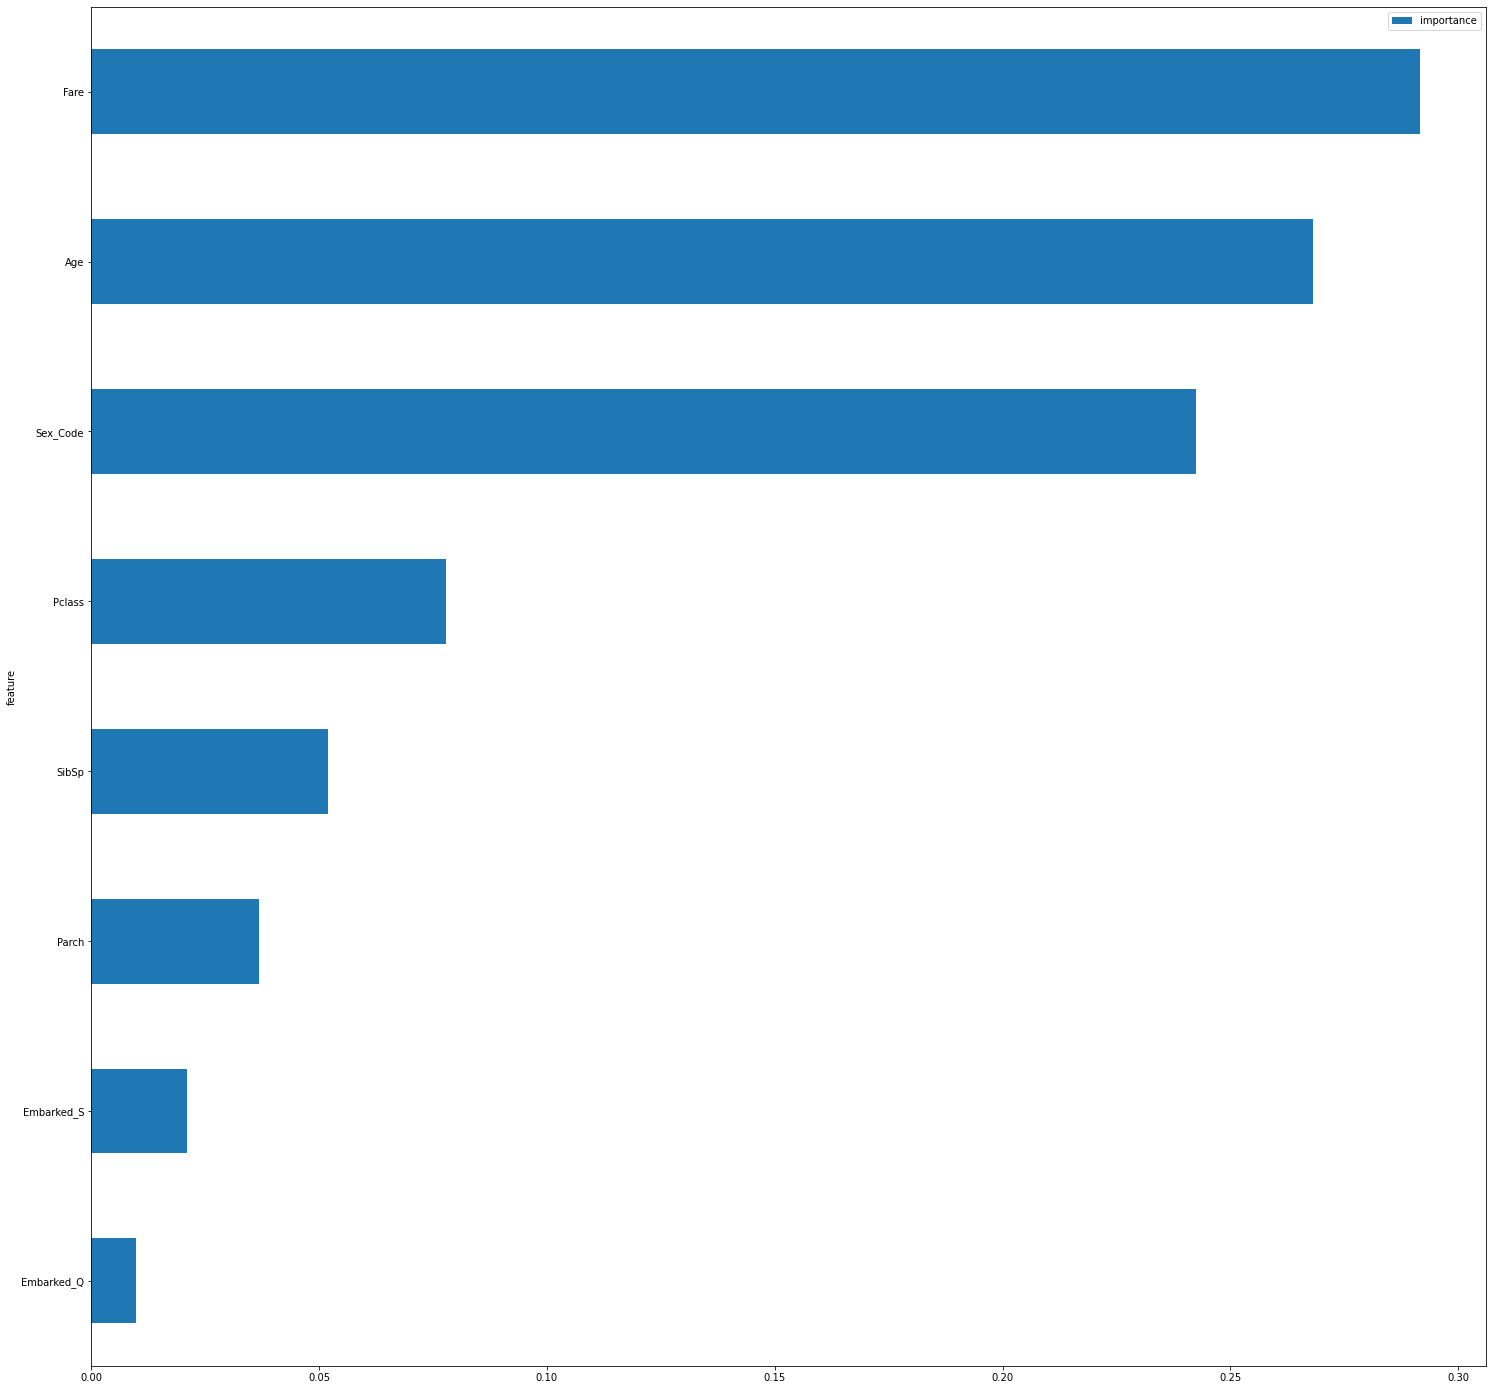

In [92]:
random_forest = RandomForestClassifier(n_estimators=50, max_features='sqrt')
random_forest = random_forest.fit(x[Base], y)

features = pd.DataFrame()
features['feature'] = x[Base].columns
features['importance'] = random_forest.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

# Reference

https://medium.com/datadriveninvestor/start-with-kaggle-a-comprehensive-guide-to-solve-the-titanic-challenge-8ac5815b0473
https://www.kaggle.com/viczyf/titanic-random-forest-82-78